# Выявление закономерностей, определяющих успешность игры 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Hужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Цель работы: 
* обнаружить закономерности, которые определяют успешность игры.

Задачи:
* Изучить файлы с данными, общую информацию;
* Заменить тип данных, заполнить пропуски, выявить ошибки/аномальные данные.
* Посчитать суммарные продажи во всех регионах;
* Анализ и описание данных;
* Составить портрет пользователей каждого региона;
* Проверка гипотез:
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    

### 1. Изучение файлов с данными и общей информации по ним. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import plotly.express as px
import pandas_profiling
from pandas_profiling import ProfileReport

In [2]:
games = pd.read_csv("/Users/valeriyaniskorodova/Y.Praktikum/games.csv")

In [3]:
# games = pd.read_csv("/datasets/games.csv")

In [4]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Сразу приведу название столбцов к нижнему регистру.

In [5]:
games.columns = games.columns.str.lower()

In [6]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
pandas_profiling.ProfileReport(games)

В табличке games 16715 строк и 11 столбцов. Пропущенные значения присутствуют в столбцах: name, year_of_release, genre, critic_score, user_score, rating. 

В таких столбцах, как na_sales, eu_sales, jp_sales, other_sales присутствуют нули, так как это столбцы с информацией о продажах, то эти данные не являются ошибкой, так как нули означают отсутствие продаж в определенном регионе.

Также есть повышенный коэффициент корреляции у таких столбцов, как na_sales, eu_sales, other_sales.

### Шаг 2. Предобработка данных

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



Поменяем тип данных в столбце year_of_release на  datetime, так как это столбец, содержащий дату релиза.

In [9]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y')

In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


In [12]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Данные столбца user_score должны быть типа float, но из-за того, что в них присутствует такое аббревиатура, как 'tbd', эти данные имеют тип object. 

Данная аббревиатура используется, когда что-то еще не решено или еще неизвестно. У меня есть предположение, что рейтинг выставляется, когда её оценят определенное количество пользователей, в тех данных, где присутствует tbd не набралось этих пользователей для выставления средней оценки игры.

In [13]:
("Количество строк с аббревиатурой tbd :{}".format(len(games.query('user_score =="tbd"'))))

'Количество строк с аббревиатурой tbd :2424'

Данные этого столбца понадобятся в дальнейшем исследовании, оставлять их в таком виде будет не правильно. 


    Приведем столбцы с категориальными данными к нижнему регистру, чтобы избежать ошибок при группировки данных.

In [14]:
for name in ['name', 'platform', 'genre']:
    games[name] = games[name].str.lower()

In [15]:
games.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989-01-01,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006-01-01,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,wii,2006-01-01,misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,wii,2009-01-01,platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,nes,1984-01-01,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



А теперь я заменю tbd на  NaN, чтобы в дальнейшем изменить этот столбец на численный тип, так как мне нужно будет работать с ним в исследовательской части.


In [16]:
games['user_score'] = games['user_score'].where(games['user_score'] != 'tbd', 'NaN')

In [17]:
len(games[games['user_score'] == 'tbd'])

0

In [18]:
games['user_score'] = games['user_score'].astype('float')

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


    Перехожу к обработке пропусков, нулей, ошибок.

In [20]:
games.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


У нас всего 2 неизвестных значения игр, выпущенных в 1993 на платформу gen. Скорее всего, из-за того, что эта игра была выпущенна довольно давно, не сохранились данные о ней. Мы видим также пропуски в столбце жанр, рейтинг, рейтинг по возрастной категории. Так как таких значений очень мало, удаление их не повлияет на дальнейшие исследования.

In [21]:
games.dropna(subset=['name'], inplace=True)
games.reset_index(drop=True, inplace=True)

In [22]:
games['name'].isnull().sum()

0

In [23]:
games['year_of_release'].isnull().sum()

269

Пропущенных данных меньше 2%, это значит, что можно их удалить, так как они не повлияют на наши дальнейшие исследования.

In [24]:
games.dropna(subset=['year_of_release'], inplace=True)
games.reset_index(drop=True, inplace=True)

In [25]:
games['year_of_release'].isnull().sum()

0

In [26]:
games['genre'].isnull().sum()

0

Пропущенный жанры были в тех же строках, что и пропущенные имена, я удалила эти строки.

In [27]:
games['user_score'].isnull().sum()

8981

In [28]:
games['critic_score'].isnull().sum()

8461

Я предлагаю оставить эти пропущенные данные, так как заменять их на среднее по игре( а она может быть выпущена на разных платформах, при этом рейтинг зависит от того, на какой платформе она выпущена) не совсем корректно, это может привести к искожению исследований.

In [29]:
games.query('user_score.isnull() & critic_score.isnull() & rating.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989-01-01,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984-01-01,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005-01-01,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,samurai warriors: sanada maru,ps3,2016-01-01,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,lma manager 2007,x360,2006-01-01,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,haitaka no psychedelica,psv,2016-01-01,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,spirits & spells,gba,2003-01-01,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Заметим, что большинство пропущенных значений в столбцах critic_score, user_score, rating совпадают, что може говорить о том, что пропуски появились по какой-то определенной причине, и эти столбцы взаимосвязаны между собой. Так как обработать эти пропуски определенным методом нет возможности, я оставлю их нетронутымы, в дальнейшем эти значения в анализе использовать не буду.

    Посчитаю суммарные продажи во всех регионах 

In [30]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] +\
games['jp_sales'] + games['other_sales']

In [31]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Промежуточный вывод:
* Были изменны типы данных в таких столбцах, как:
    * year_of_release
    * critic_score
    * user_score
* Была обработана аббревиатура tbd в столбце user_score и заменена на ноль
* Были обработаны пропущенные данные:
    * В столбце name, genre строки с пропусками были удалены
    * В столбце year_of_release	я также удалила пропуски, так как эти данные несут меньше 2% информации от всего столбца
    * В столбцах critic_score, user_score, rating мною было решено оставить пропущенные значения, так как я не нашла подходящий метод обработки для этих данных.

### Шаг 3. Исследовательский анализ данных

    Посмотрим, сколько игр выпускалось в разные года.

In [32]:
amount_per_year = games.pivot_table(index='year_of_release',\
                                    values='name', aggfunc=['count'])
amount_per_year.columns=['amount_of_games']
amount_per_year.reset_index(inplace=True)
amount_per_year.head()

,year_of_release,amount_of_games
0,1980-01-01,9
1,1981-01-01,46
2,1982-01-01,36
3,1983-01-01,17
4,1984-01-01,14


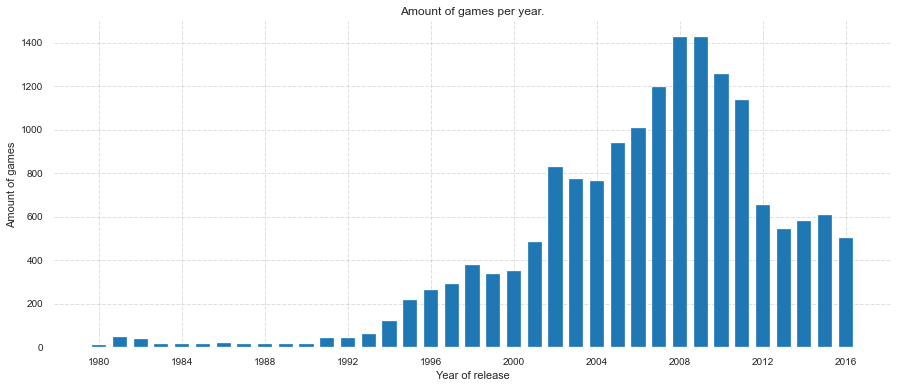

In [33]:
plt.figure(figsize=(15,6))
plt.bar(amount_per_year['year_of_release'],\
        amount_per_year['amount_of_games'], width=250)
plt.grid(True, linestyle='--', which='major',color='grey', alpha=.25)
plt.xlabel('Year of release')
plt.ylabel('Amount of games')
plt.title('Amount of games per year.')
plt.show()

Данные до 1994 года не представляют интерес для дальнейшего анализа.

    Проследим изменения продаж по платформам.

In [34]:
# Платформы с наибольшими суммарными продажами
sales_platform = games.pivot_table(index=['platform'],\
                                   values='total_sales', aggfunc='sum')
top_10_platform = sales_platform.sort_values(by='total_sales', ascending=False).head(10)
top_10_platform

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


In [35]:
top_top = games[games.platform.isin(top_10_platform.index)]

In [36]:
top_for_plot = top_top.pivot_table(index=['platform','year_of_release'],\
                                   values='total_sales', aggfunc='sum')
top_for_plot.reset_index( inplace=True)
top_for_plot

,platform,year_of_release,total_sales
0,3ds,2011-01-01,63.20
1,3ds,2012-01-01,51.36
2,3ds,2013-01-01,56.57
3,3ds,2014-01-01,43.76
4,3ds,2015-01-01,27.78
...,...,...,...
92,x360,2012-01-01,99.74
93,x360,2013-01-01,88.58
94,x360,2014-01-01,34.74
95,x360,2015-01-01,11.96


Посмотрим распределение по годам, отбросив период до 1994 года, так как мы решили, что он не представляет интерес.

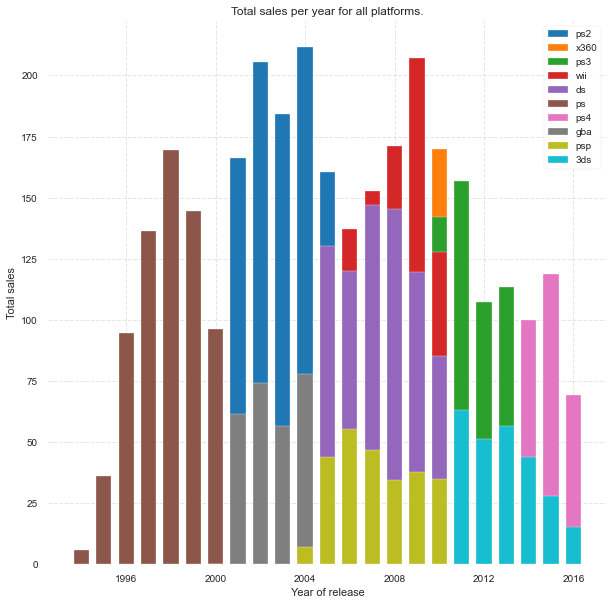

In [37]:
# Распределение по годам, начиная с 1994 года
plt.figure(figsize=(10,10))
top_for_plot = top_for_plot[top_for_plot['year_of_release'] >= '1994']
for name in ['ps2', 'x360', "ps3", "wii", "ds", "ps", "ps4", "gba", "psp", "3ds"]:
    new_plot = top_for_plot[top_for_plot['platform'] == name]
    p=plt.bar( new_plot['year_of_release'],\
              new_plot['total_sales'], width=250, label = name )
    plt.legend()
    plt.xlabel('Year of release')
    plt.ylabel('Total sales')
    plt.grid(True, linestyle='--', which='major', alpha=.5)
plt.title('Total sales per year for all platforms.')
plt.show()

Text(0, 0.5, 'Total sales')

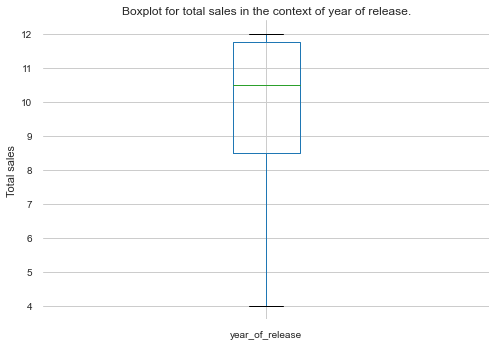

In [38]:
# Сводная таблица с информацией 
avr_life_platform = top_for_plot.pivot_table(index='platform',\
                                             values='year_of_release', aggfunc='count')
avr_life_platform.reset_index(inplace=True)
avr_life_platform.boxplot()
plt.title('Boxplot for total sales in the context of year of release.')
plt.ylabel('Total sales')


In [39]:
avr_life_platform.describe()

,year_of_release
count,10.00000
mean,9.60000
std,2.75681
min,4.00000
25%,8.50000
50%,10.50000
75%,11.75000
max,12.00000


Видно, что в среднем продолжительность жизни платформы занимает около **10 лет**.

    Теперь нужно построить графики и провести анализ данных за актуальный период.Основной фактор — эти данные помогут построить прогноз на 2017 год.

Я выберу период 2011 - 2016. Так как это период, когда у большинство платформ из нашего списка происходит спад популярности, а часть из них наоборот находятся в периоде активного роста. Такая выборка даст нам более точные прогнозы на 2017 год.

In [40]:
top_for_plot_range = top_for_plot[top_for_plot['year_of_release'] >= '2011']

In [41]:
top_for_plot_range.head()

,platform,year_of_release,total_sales
0,3ds,2011-01-01,63.20
1,3ds,2012-01-01,51.36
2,3ds,2013-01-01,56.57
3,3ds,2014-01-01,43.76
4,3ds,2015-01-01,27.78


In [42]:
top_for_plot_range.pivot_table(index='platform',\
                               values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False)

,total_sales
platform,
ps3,445.57
x360,380.38
ps4,314.14
3ds,257.81
wii,95.02
ds,38.73
psp,29.01
ps2,0.45


In [43]:
actual_period = games[games['year_of_release'] >= "2011"]


In [44]:
sales_period = actual_period.pivot_table(index=['platform','year_of_release'],\
                                   values='total_sales', aggfunc='sum')
sales_period.reset_index(inplace=True)

In [45]:
sales_period['year'] = sales_period['year_of_release'].dt.year

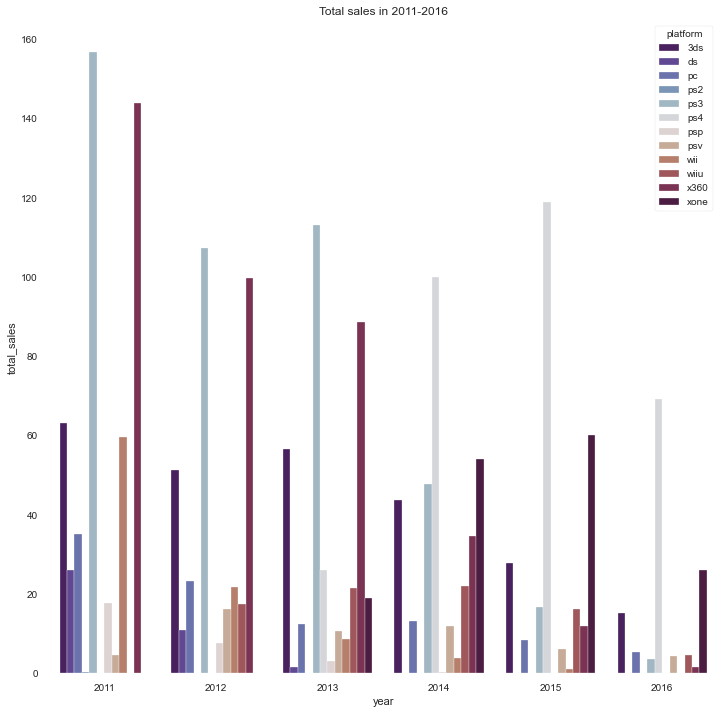

In [46]:

plt.figure(figsize=(12,12))
sns.barplot(x='year', y='total_sales', data=sales_period, hue='platform', palette=("twilight_shifted")).\
set_title('Total sales in 2011-2016')

plt.show()


Отсюда видим, что лидеры продаж в 2011-2013 году были **PS3, X360** к 2016 году теряют свою активность в продажах, когда как платформа **PS4** и  **XONE** начиная с 2013 года имеет довольно активный период продаж. Заметим также, что **3DS** имел довольно стабильные продаже за весь рассматриваемый период. Из данного анализа можно сделать вывод, что потенциально прибыльными платформами мы можем считать PS4, а также 3DS( хотя доход намного меньше, чем у PS4, но при этом он стабильный).


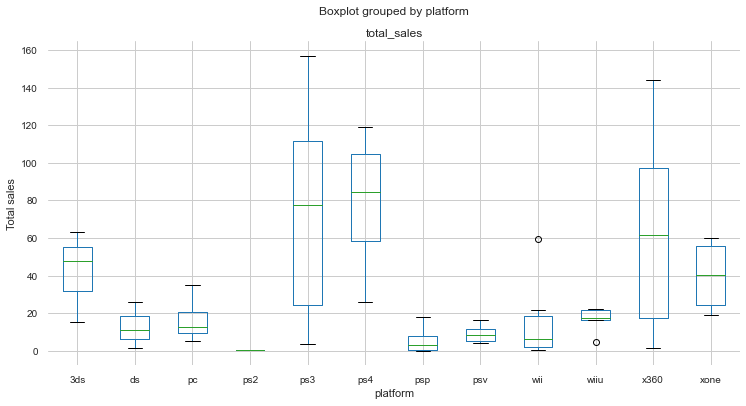

In [47]:
# «ящик с усами» по глобальным продажам игр
sales_period.boxplot(column='total_sales', by='platform', figsize=(12,6))
plt.ylabel('Total sales')
plt.show()


Видим, что медиана PS4 занимает наивысшее положение и она смещена вверх. У платформы PS3 медиана не сильно отличается от PS4, но разброс значений больше. Видим, что медиана также, как и в случае PS4 стремится к верхнему усу. Далее идет Х360, медиана которого ( чуть больше 60 млн проданных копий), также можно заметить стремление медианы к верхнему усу. У платформы Xone среднее значение продаж 40 млн( не такое большое, как у PS4). В остальных компаниях разброс очень маленький, медианы расположены намного ниже, по сравнению с этими 3 компаниями.



К лидерам продаж за период 2011-2016 относятся такие компании, как PS4,PS3,Х360, Xone.


Теперь рассмотрю, как влияют на продажи отзывы критиков и пользователей на примере одной из популярных платформ. Я возьму платформу PS3, так как за период 2011-2016 год она была в топе, хотя с 2014 года продажи падают, но это можно объяснить еще тем, что с 2013 была выпущена платформа  PS4, это одна компания, а значит, что большинство игр стали выпускать на новой платформе. 

In [48]:
ps3_data = games[(games['platform'] == "ps3") & (games['year_of_release'] >= "2011")]

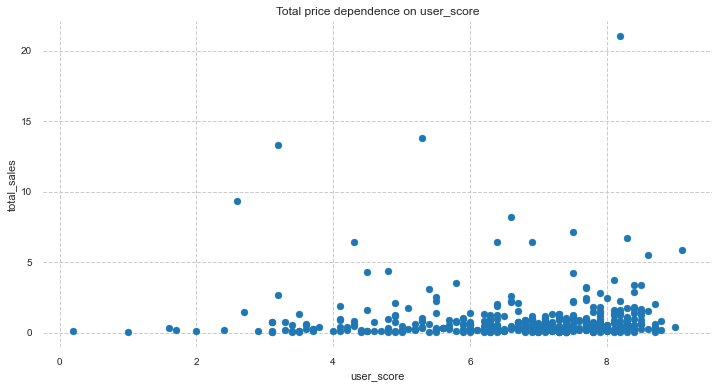

Correlation coefficient:


,user_score,total_sales
user_score,1.000000,0.014089
total_sales,0.014089,1.000000


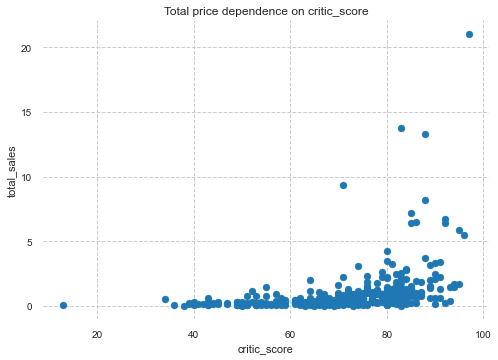

Correlation coefficient:


,critic_score,total_sales
critic_score,1.000000,0.380111
total_sales,0.380111,1.000000


In [49]:
plt.figure(figsize=(12,6))
for element in ['user_score', 'critic_score']:
    plt.scatter(ps3_data[element], ps3_data['total_sales'])
    plt.xlabel(element)
    plt.ylabel('total_sales')
    plt.grid(True, linestyle='--')
    plt.title('Total price dependence on {}'.format(element))
    plt.show()
    print('Correlation coefficient:')
    display(ps3_data[[element, 'total_sales']].corr())

Отзывы пользователей никак не сказываются на общую прибыль платформы, когда как отзывы критиков имеют вес, но очень небольшой. 

Коэффициент корреляции отзыв критика-доход :0.38, отзыв пользователя-доход:0.14

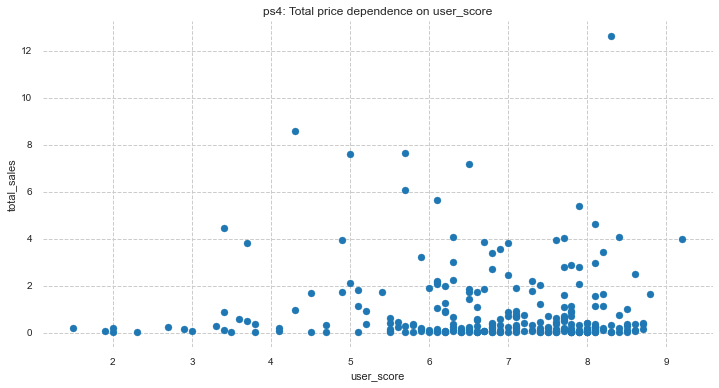

Correlation coefficient:


,user_score,total_sales
user_score,1.000000,-0.031957
total_sales,-0.031957,1.000000


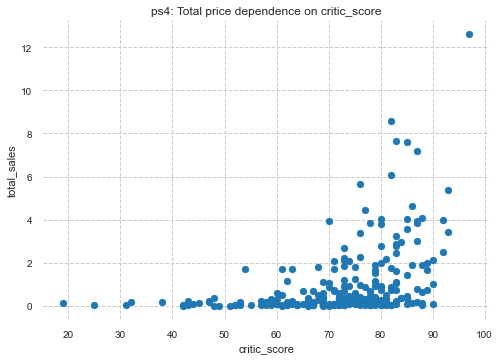

Correlation coefficient:


,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


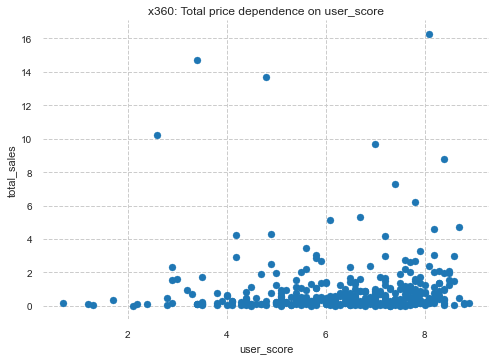

Correlation coefficient:


,user_score,total_sales
user_score,1.000000,0.038918
total_sales,0.038918,1.000000


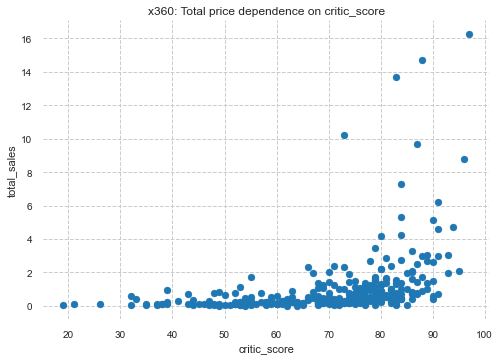

Correlation coefficient:


,critic_score,total_sales
critic_score,1.000000,0.391253
total_sales,0.391253,1.000000


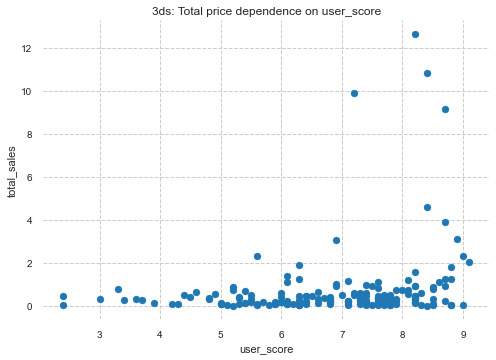

Correlation coefficient:


,user_score,total_sales
user_score,1.000000,0.222078
total_sales,0.222078,1.000000


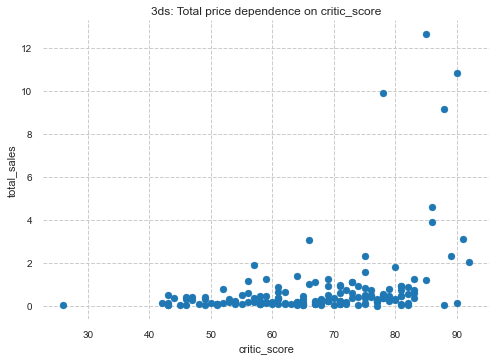

Correlation coefficient:


,critic_score,total_sales
critic_score,1.00000,0.34874
total_sales,0.34874,1.00000


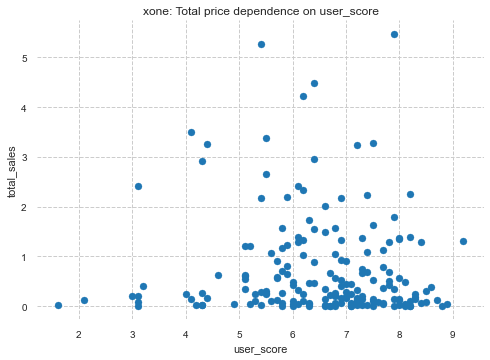

Correlation coefficient:


,user_score,total_sales
user_score,1.000000,-0.068925
total_sales,-0.068925,1.000000


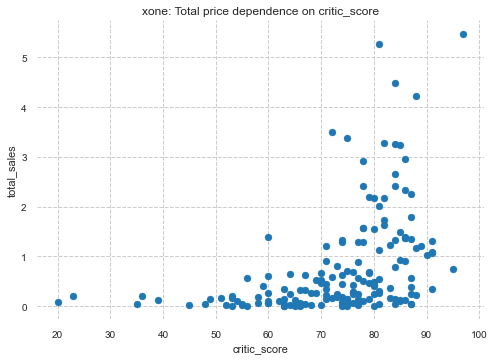

Correlation coefficient:


,critic_score,total_sales
critic_score,1.000000,0.416998
total_sales,0.416998,1.000000


In [50]:
plt.figure(figsize=(12,6))
for platforms in ['ps4', 'x360', '3ds', 'xone']:
    platf_data = games[(games['platform'] == platforms) & (games['year_of_release'] >= "2011")]
    for element in ['user_score', 'critic_score']:
        plt.scatter(platf_data[element], platf_data['total_sales'])
        plt.xlabel(element)
        plt.ylabel('total_sales')
        plt.grid(True, linestyle='--')
        plt.title('{}: Total price dependence on {}'.format(platforms, element))
        plt.show()
        print('Correlation coefficient:')
        display(platf_data[[element, 'total_sales']].corr())

Видно, что для остальных платформ свойственное аналогичное поведение, а значит, можно сказать, что зависимость оценки пользователя от дохода - нулевая, а зависимость оценки критика от дохода - низкая.

In [51]:
# Сводная таблица распределения игр по жанрам.
genre_data = games.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_data.sort_values(by='total_sales', ascending=False)


,total_sales
genre,
action,1716.52
sports,1309.67
shooter,1041.36
role-playing,931.08
platform,825.55
misc,790.29
racing,723.49
fighting,442.66
simulation,387.96


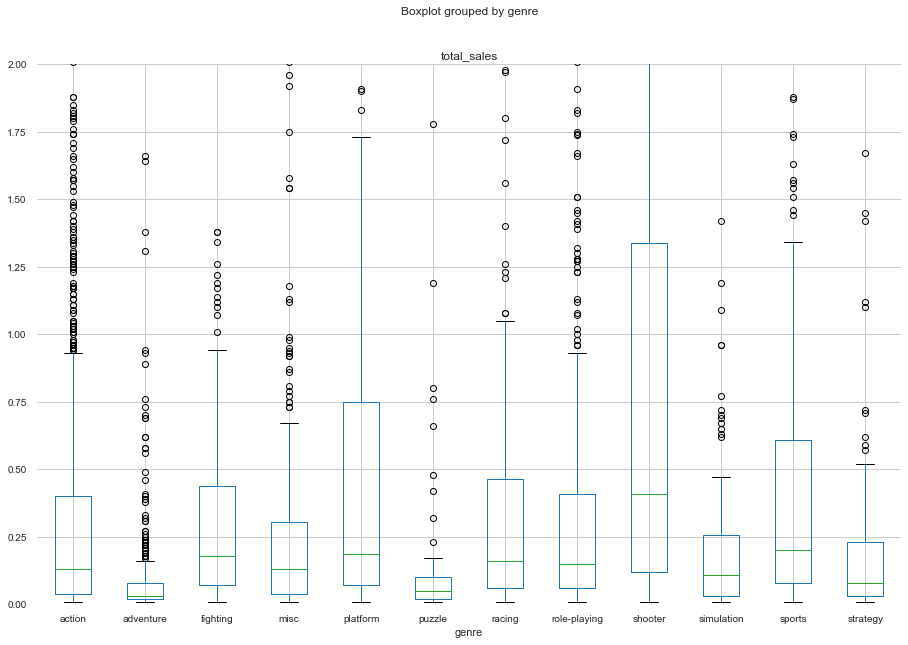

In [52]:

actual_period.boxplot(column='total_sales', by='genre', figsize=(15,10))
plt.ylim(0, 2)
plt.show()

Самые высокие средние продажи у жанра shooter. Хотя лидирующее место по суммарным продажам занимает жанр action, но средние продажи у него в 3 раза меньше. Жанр adventure, puzzle имеют самые низкие средние продажи.

### Шаг 4.Портрет пользователя каждого региона

    Самые популярные платформы (топ-5)

In [53]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    region_data = actual_period.pivot_table(index='platform',values=[region],\
                                            aggfunc='sum').\
    sort_values(by=region, ascending=False).head()
    region_data['ratio'] = round(region_data[region] / region_data[region].sum(), 2)
    display(region_data)

,na_sales,ratio
platform,,
x360,226.80,0.33
ps3,168.26,0.25
ps4,108.74,0.16
xone,93.12,0.14
3ds,82.65,0.12


,eu_sales,ratio
platform,,
ps3,163.10,0.30
ps4,141.09,0.26
x360,117.10,0.22
3ds,61.27,0.11
pc,56.70,0.11


,jp_sales,ratio
platform,,
3ds,100.62,0.47
ps3,49.39,0.23
psp,24.04,0.11
psv,21.84,0.10
ps4,15.96,0.08


В Северной Америке  и Европе платформы имеют одинаковый набор, кроме одной платформы и там и там, отличаются только долей продажи. Чего не скажешь о Японии, где ТОП-5 платформ значительно отличается.

В Америке и Европе платформа PS4 набирает обороты и занимает (2 место в Европе, 3 в америке), то в Японии эта платформа занимает последенее место, что говорит о том, что, когда в таких странах, как Европа и Америка выходит новая платформа, в Японии она становится популярной намного позже.

Но есть и сходства, например, платформа ps3 в Японии занимает второе место, как и в Америке.

Но, что еще интересно, что в Японии лидирующую позицию занимает платформа 3ds, которая в Америке и Европе занимает последнее/предпоследнее место.

    Самые популярные жанры (топ-5)

In [54]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    genre_data = actual_period.pivot_table(index='genre', values=region, aggfunc='sum').\
    sort_values(by=region, ascending=False).head()
    display(genre_data)

,na_sales
genre,
action,230.92
shooter,194.43
sports,108.70
role-playing,83.78
misc,69.69


,eu_sales
genre,
action,199.12
shooter,148.02
sports,88.48
role-playing,62.30
racing,40.58


,jp_sales
genre,
role-playing,79.87
action,63.62
misc,17.60
fighting,12.38
platform,12.13


Интересно, что в Америке и Европе даже популярность жанров имеет тот же порядок, кроме последнего жанра в каждом наборе. В Японии топовую позицию занимает жанр role-playing, который в Америке и Европе находится на 4 месте. На втором месте action, который в находится на первом месте в Америке и Европе. Также заметим интерес в Японии к такому жанру, как misc ( 3 место), в Америке это один из менее популярных жанром( находится на последнем месте).


    Влияние рейтинга ESRB на продажи в отдельном регионе.

In [55]:
actual_period['rating'].unique()

array(['M', nan, 'E', 'E10+', 'T', 'EC', 'RP'], dtype=object)

* EC - Для детей младшего возраста : Игра подходит для детей от 3 лет и старше;
* E - Для всех : от 6 лет и старше;
* E10+ - Для всех от 10 лет и старше;
* T  — Подросткам: Игра подходит для лиц от 13 лет и старше;
* M - Для взрослых : Материалы игры не подходят для подростков младше 17 лет;
* RP — Рейтинг ожидается : Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

In [56]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    rating_data = actual_period.pivot_table(index='rating', values=region,\
                                            aggfunc='sum').sort_values(by=region,\
                                                                       ascending=False).\
    head()
    display(rating_data)

,na_sales
rating,
M,308.45
E,170.17
E10+,117.72
T,109.31
EC,0.42


,eu_sales
rating,
M,250.26
E,141.73
T,83.16
E10+,78.00
RP,0.03


,jp_sales
rating,
E,36.68
T,33.39
M,26.14
E10+,11.23
EC,0.00


Видим, что Европа и Америка опять имеют сходства. В Японии пользуется популярность игры для всех( с 6 лет), когда как на западе данный рейтинг игры находится на втором месте. Игры для взрослых на западе занимают лидирующую позицию, когда как на востоке всего лишь третье место. Можно предположить, что взрослые люди на востоке играют в игры намного реже, нежели, чем люди на западе. Но у нас нет достовернной информации о том, а точно ли возраст игрока соотвествует заявленному рейтингу.

### Шаг 5.Проверка гипотез.

Начнем с формирования нулевой гипотезы H₀. Она звучит так : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Исходя из H₀ сформулирую альтернативную гипотезу H₁, которая будет звучит так: Средние пользовательские рейтинги платформ Xbox One и PC различны.

В нашем случае генеральных совокупностей две. Мне нужно сопоставить их среднее. Применю метод **scipy.stats.ttest_ind()**

In [57]:
Xone= actual_period[actual_period['platform'] == 'xone']
pc = actual_period[actual_period['platform'] == 'pc']

Проведу проверку дисперсии выборок

In [58]:
from scipy.stats import levene

In [59]:
Xone = Xone.dropna(subset=['user_score'])
pc = pc.dropna(subset=['user_score'])

In [60]:
stat, p = levene(Xone['user_score'], pc['user_score'])
p

0.019238606822499546

In [61]:
np.var(Xone['user_score'], ddof = 1)

1.9069968429360695

In [62]:
np.var(pc['user_score'], ddof=1)

2.5962957995358837

Диссперсия не одинаковая.

In [63]:
alpha = .05


In [64]:
results = st.ttest_ind(Xone['user_score'], pc['user_score'], equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


In [65]:
print('Средний пользовательский рейтинг платформы Xone: {}'.\
      format(Xone['user_score'].median()))

Средний пользовательский рейтинг платформы Xone: 6.8


In [66]:

print('Средний пользовательский рейтинг платформы PC: {}'.\
      format(pc['user_score'].median()))

Средний пользовательский рейтинг платформы PC: 6.8


Действительно, видно, что средний пользовательский рейтинг данных платформ одинаковый.

Вторая нулевая гепотиза гипотезы H₀ звучит так : Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

Альтернативная гипотеза H₁ : Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [67]:
action = actual_period[actual_period['genre'] == 'action']
sports = actual_period[actual_period['genre'] == 'sports']

Проведу проверку дисперсии выборок

In [68]:
action = action.dropna(subset=['user_score'])
sports = sports.dropna(subset=['user_score'])

In [69]:
stat, p = levene(action['user_score'], sports['user_score'])
p

1.9840382117903915e-05

Значение p очень маленькое, что означает, что диссперсия у выборок не одинаковая.

In [70]:
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 8.285648549432565e-19
Отвергаем нулевую гипотезу


In [71]:

print('Средний пользовательский жанра action: {}'.\
      format(action['user_score'].median()))

Средний пользовательский жанра action: 7.1


In [72]:
print('Средний пользовательский жанра sports: {}'.\
      format(sports['user_score'].median()))

Средний пользовательский жанра sports: 6.0


Действительно, средний пользовательский рейтинг у двух жанров различный.

### Общий вывод.

Во время проведенной работы были изучены данные, выявлены пропуски, ошибки, они были обработаны.

* Были изменны типы данных в таких столбцах, как:
    * year_of_release
    * critic_score
    * user_score
* Была обработана аббревиатура tbd в столбце user_score и заменена на ноль
* Были обработаны пропущенные данные:
    * В столбце name, genre строки с пропусками были удалены
    * В столбце year_of_release	я также удалила пропуски, так как эти данные несут меньше 2% информации от всего столбца
    * В столбцах critic_score, user_score, rating мною было решено оставить пропущенные значения, так как я не нашла подходящий метод обработки для этих данных.

Было проведено исследование по количеству игр, выпущенных за все года. Я сделала вывод, что данные **до 1994** года не представляют интерес для дальнейшего анализа. 

Также, было обнаружено, что в среднем продолжительность жизни платформы занимает около **10 лет**.

Мною был выбран актуальный период : **2011-2016** год.


Лидеры продаж в 2011-2013 году были **PS3, X360**. К 2016 году  они теряют свою активность в продажах, когда как платформы **PS4** и **XONE** начиная с 2013 года имеет довольно активный период продаж


Отзывы пользователей никак не сказываются на общую прибыль платформы, когда как отзывы критиков имеют вес, но очень небольшой. 

Самые высокие средние продажи у жанра shooter. Хотя лидирующее место по суммарным продажам занимает жанр action, но средние продажи у него в 3 раза меньше. 

Для западного рынка актуальны игры, сделанные для платформ: **X360, PS3, PS4**. Для восточного: **3DS**.

Самые популярные жанры на западе: **action, shooter, sports**. Когда, как на востоке: **role-playing**.

В Америке и Европе пользуется популярности игры **для взрослых**. В Японии **игры для всех( начиная с возраста 6 лет)**.